#**Parkinson's Disease Predition - Random Forest & Logistic Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#load data
data=pd.read_csv("c:\\Users\\USER\\Downloads\\parkinson's.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
#data preprocessing
data=data.drop(columns=['name'],axis=1)

In [6]:
import os
import matplotlib.pyplot as plt
image_folder = r'C:\Users\USER\Downloads\images'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)


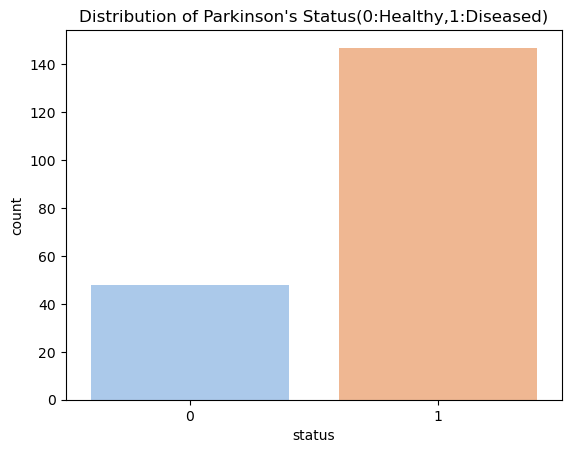

In [8]:
#plot Target distribution of parkinson's(EDA)
sns.countplot(x='status', data=data, hue='status', palette='pastel', legend=False)
plt.title('Distribution of Parkinson\'s Status(0:Healthy,1:Diseased)')
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Distribution of Parkinson\'s Status.png')
plt.show()


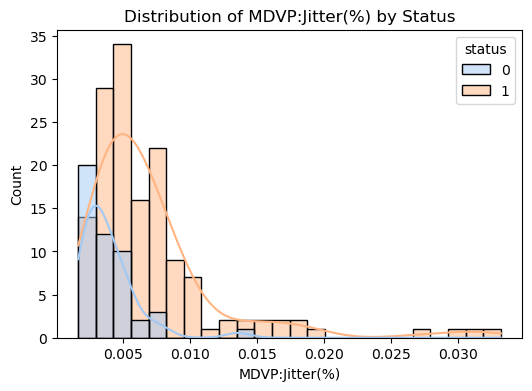

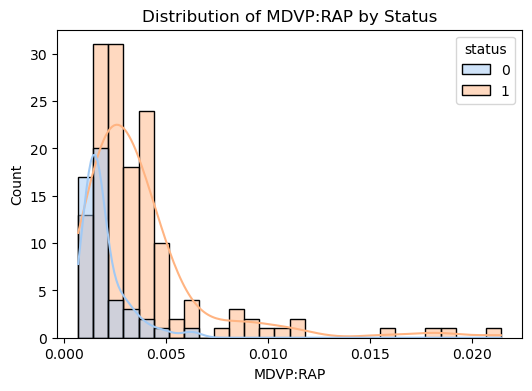

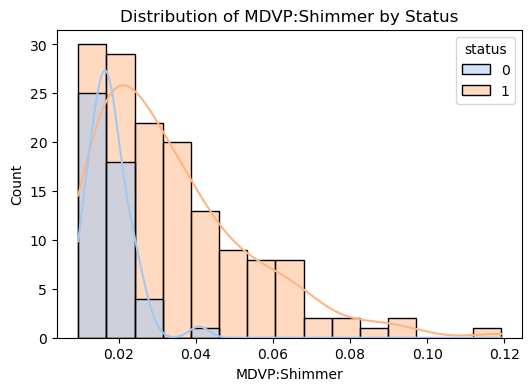

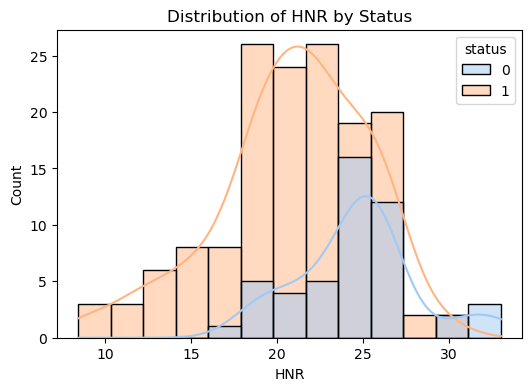

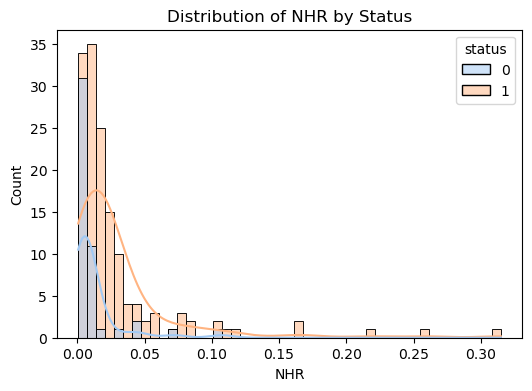

In [10]:
#distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of key features
features = ['MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:Shimmer', 'HNR','NHR']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=feature, hue='status', kde=True, palette='pastel')
    plt.title(f'Distribution of {feature} by Status')
    plt.savefig('C:\\Users\\USER\\Downloads\\images\\Distribution of {feature} by Status.png')
    plt.show()


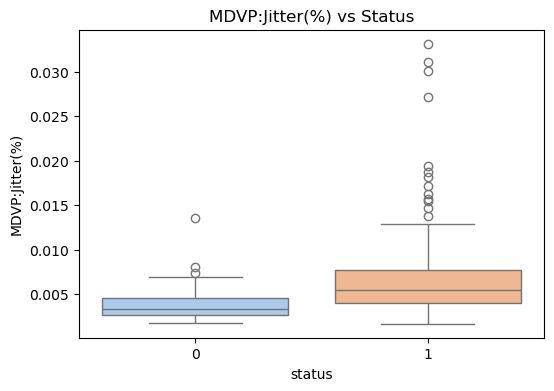

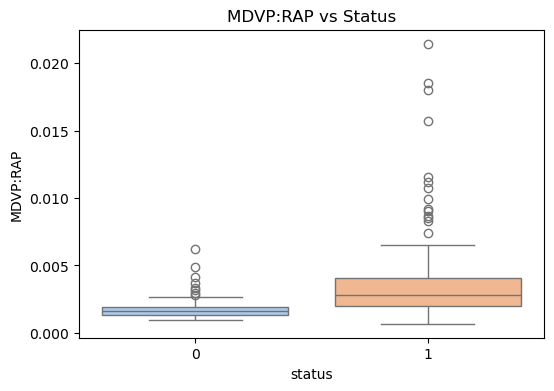

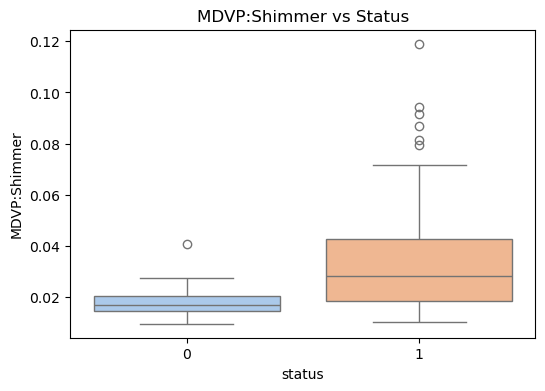

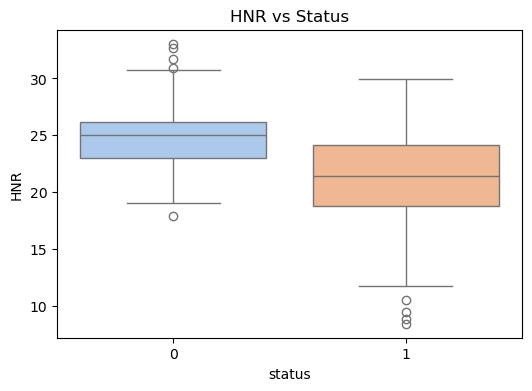

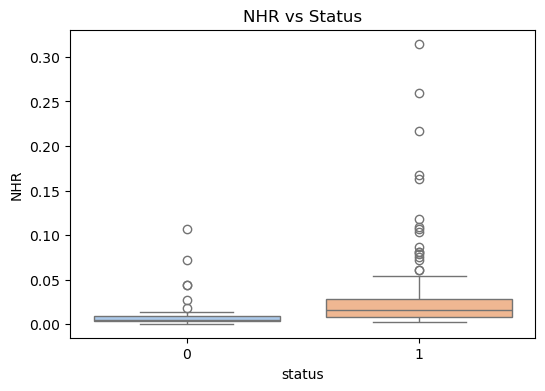

In [11]:
#boxplot to show feature seperation
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='status',y=feature,data=data,palette='pastel',hue='status',legend=False)
    plt.title(f'{feature} vs Status')
    plt.savefig('C:\\Users\\USER\\Downloads\\images\\feature vs status.png')
    plt.show()
    

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   

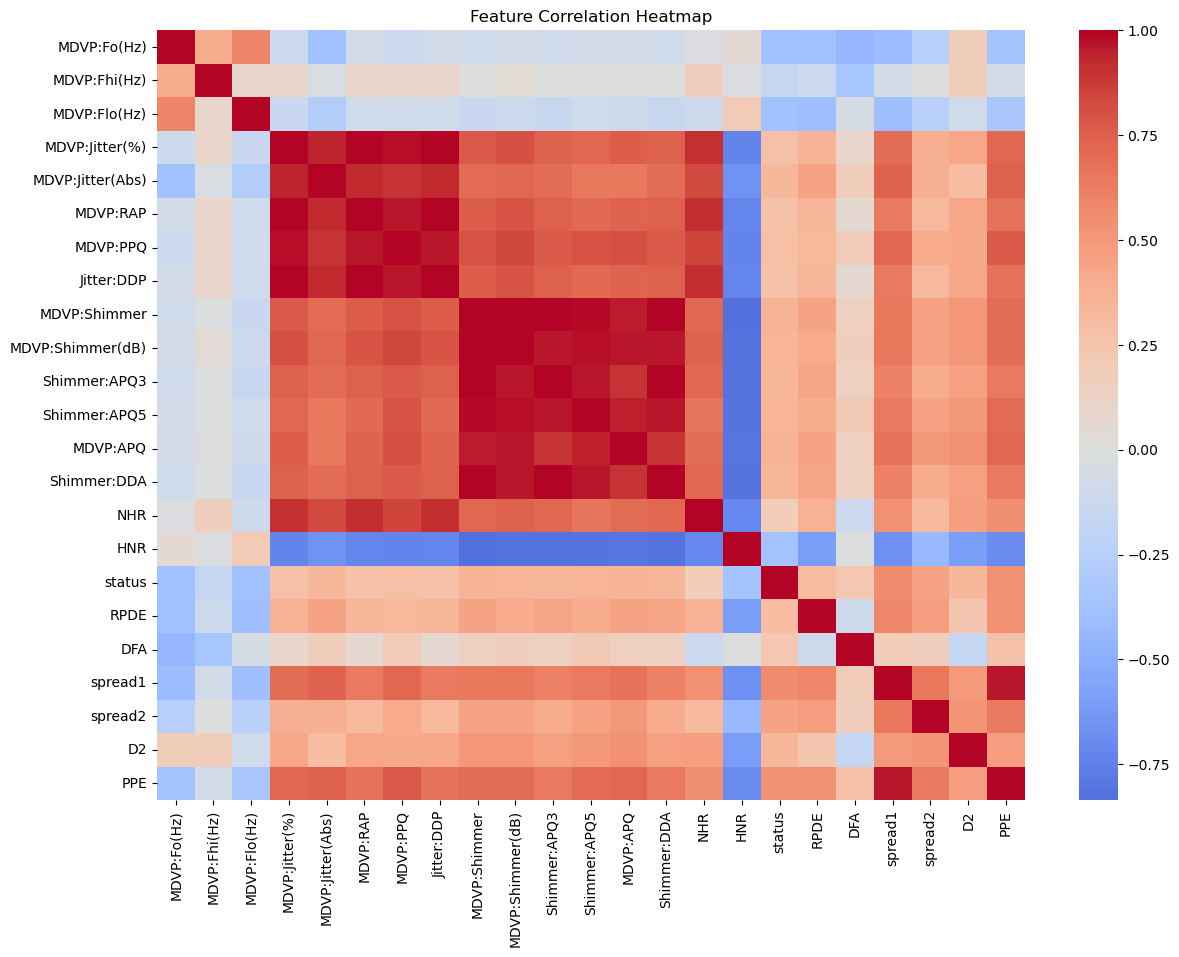

In [12]:
#correlation heatmap
plt.figure(figsize=(14,10))
corr=data.corr()
print(corr)
sns.heatmap(corr,cmap='coolwarm',center=0,annot=False)
plt.title('Feature Correlation Heatmap')
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Feature Correlation Heatmap.png')
plt.show()


#**FULL FEATURES MODELS RESULT**

In [14]:
X=data.drop(columns=['status'])
y=data['status']

In [15]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
#feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
#train random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
#predict using the model
y_pred_rf=rf_model.predict(X_test)


In [18]:
#evaluate
print("Random Forest Model Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Classification Report:\n",classification_report(y_test,y_pred_rf))
      

Random Forest Model Accuracy: 0.9487179487179487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Confusion Matrix:
 [[ 5  2]
 [ 0 32]]


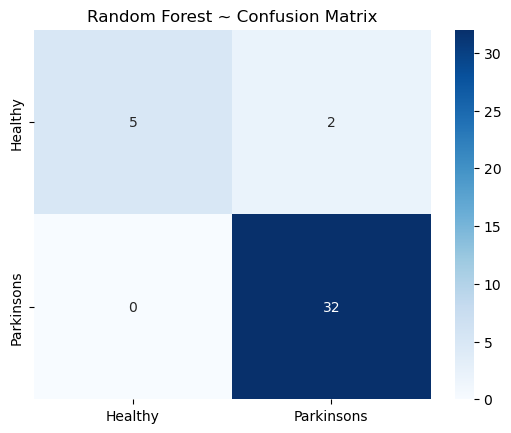

In [19]:
#confusion matrix for random forest
conf_matrix_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix:\n",conf_matrix_rf)
sns.heatmap(conf_matrix_rf,annot=True,fmt='d',cmap='Blues',xticklabels=['Healthy','Parkinsons'],
            yticklabels=['Healthy','Parkinsons'])
plt.title('Random Forest ~ Confusion Matrix')
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Random_Forest~Confusion_Matrix.png')
plt.show()

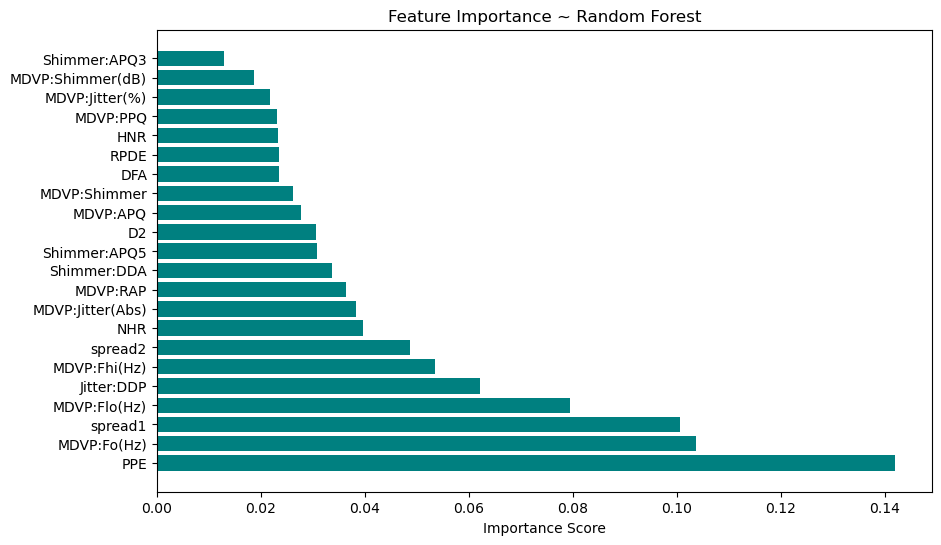

In [20]:
#feature importance
importances=rf_model.feature_importances_
feature_names=X.columns
#create dataframe for sorting
feat_imp_df=pd.DataFrame({'Features':feature_names,'Importances':importances})
feat_imp_df=feat_imp_df.sort_values(by='Importances',ascending=False)
#plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Features'],feat_imp_df['Importances'],color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance ~ Random Forest")
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Feature Importance ~ Random Forest.png')
plt.show()

In [21]:
#train logistic regression
lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
#predict using trained model
y_pred_lr=lr_model.predict(X_test)



In [22]:
#evaluate
print("Logistic Regression Model Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Classification Report:\n",classification_report(y_test,y_pred_lr))

Logistic Regression Model Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



Confusion Matrix:
 [[ 3  4]
 [ 0 32]]


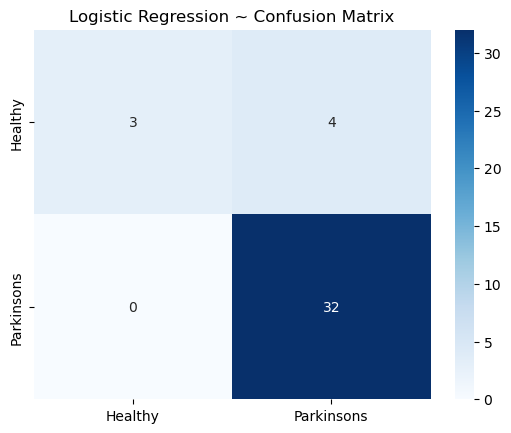

In [23]:
#confusion matrix logistic regression
conf_matrix_lr=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:\n",conf_matrix_lr)
sns.heatmap(conf_matrix_lr,annot=True,fmt='d',cmap='Blues',xticklabels=['Healthy','Parkinsons'],
            yticklabels=['Healthy','Parkinsons'])
plt.title('Logistic Regression ~ Confusion Matrix')
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Logistic Regression ~ Confusion Matrix.png')
plt.show()

In [24]:
#prediction using new data(random forest)
#take one example from dataset
sample=X.iloc[0].copy()
#modify some values if we want
sample['spread1']=-3.456
sample['PPE']=0.34566
new_data=pd.DataFrame([sample])
print(new_data)

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA  spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285   -3.456   

    spread2        D2      PPE  
0  0.266482  2.301442  0.34566  

[1 rows x 22 columns]


In [25]:
new_data_scaled=scaler.transform(new_data)
#prediction with random forest
prediction=rf_model.predict(new_data_scaled)
#result
print("Prediction:","Parkinson's" if prediction[0]==1 else "Healthy")

Prediction: Parkinson's


#prediction using new data(logistic regression)
#take one example from dataset
sample=X.iloc[0].copy()
#modify some values if we want
sample['spread1']=-3.456
sample['PPE']=0.34566
new_data=pd.DataFrame([sample])
print(new_data)

In [26]:
new_data_scaled=scaler.transform(new_data)
#prediction with logistic regression
prediction=lr_model.predict(new_data_scaled)
#result
print("Prediction:","Parkinson's" if prediction[0]==1 else "Healthy")

Prediction: Parkinson's


#**REDUCED FEATURES MODELS RESULT**

In [27]:
# Define highly correlated features to drop
correlated_features = [
    'MDVP:RAP', 'Jitter:DDP', 'MDVP:PPQ', 'MDVP:Jitter(Abs)',
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
    'MDVP:APQ', 'Shimmer:DDA', 'spread1'
]
# 2. Create reduced feature set
X_reduced = data.drop(columns=correlated_features + ['status'])
y = data['status']

In [28]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [29]:

#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

In [30]:
# Random Forest
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_r, y_train_r)
y_pred_rf_reduced = rf_reduced.predict(X_test_r)

In [31]:
print("\nRandom Forest (Reduced Features)")
print("Accuracy:", accuracy_score(y_test_r, y_pred_rf_reduced))
print("Classification Report:\n",classification_report(y_test_r,y_pred_rf))
print(classification_report(y_test_r, y_pred_rf_reduced))


Random Forest (Reduced Features)
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [32]:
# Logistic Regression
lr_reduced = LogisticRegression(max_iter=1000)
lr_reduced.fit(X_train_r, y_train_r)
y_pred_lr_reduced = lr_reduced.predict(X_test_r)


In [33]:
print("Logistic Regression (Reduced Features)")
print("Accuracy:", accuracy_score(y_test_r, y_pred_lr_reduced))
print("Classification Report:\n",classification_report(y_test_r,y_pred_lr))
print(classification_report(y_test_r, y_pred_lr_reduced))

Logistic Regression (Reduced Features)
Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



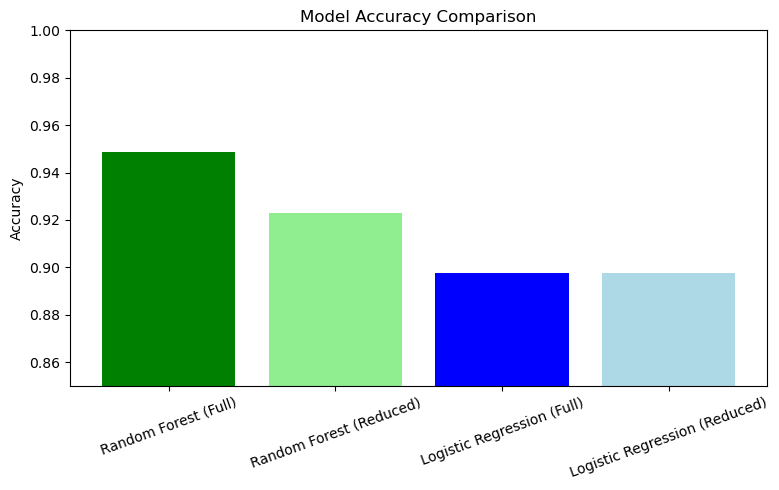

In [34]:
#barplot for  comparing models accuracy
# Accuracy values
models = [
    'Random Forest (Full)',
    'Random Forest (Reduced)',
    'Logistic Regression (Full)',
    'Logistic Regression (Reduced)'
]
accuracy_scores = [0.9487, 0.9230, 0.8974, 0.8974]
# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracy_scores, color=['green', 'lightgreen', 'blue', 'lightblue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.00)
plt.xticks(rotation=20)# to prevent overlap and make them easier to read.
plt.tight_layout()
plt.savefig('C:\\Users\\USER\\Downloads\\images\\Model Accuracy Comparison.png')




